https://machinelearningmastery.com/imbalanced-classification-model-to-detect-oil-spills/?__s=sedr9swwqoxuschybcvu

In [ ]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [1]:
import pandas as pd

pd.set_option( 'display.max_columns' , None ) 

In [2]:
Xy = pd.read_csv( 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv' , header = None )

In [3]:
Xy.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [4]:
Xy.shape

(937, 50)

In [5]:
y = Xy.values[:,-1]

In [6]:
from collections import Counter

In [7]:
counter = Counter( y )

In [8]:
print( counter )

Counter({0.0: 896, 1.0: 41})


In [13]:
for k , v in counter.items() : 
    
    p =( v / len( y ) ) * 100
    
    print( f'class : {k} | n : {v} | p : {p:.2f} %' )

class : 1.0 | n : 41 | p : 4.38 %
class : 0.0 | n : 896 | p : 95.62 %


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
y = LabelEncoder().fit_transform( y )

In [16]:
X = Xy

In [17]:
# colonne 49 : cible
X.drop( 49 , axis = 1 , inplace = True )

In [18]:
# colonne 22 : valeur unique
X.drop( 22 , axis = 1 , inplace = True )

In [19]:
# colonne 0 : identifiant
X.drop( 0 , axis = 1 , inplace = True )

In [20]:
X = X.values

# Dummy classifier

https://machinelearningmastery.com/how-to-develop-and-evaluate-naive-classifier-strategies-using-probability/

Naive classifiers :
- Predict a random class
- Predict a randomly selected class from the training dataset
- Predict the majority class from the training dataset

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.metrics import geometric_mean_score

from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier

C:\Users\FAB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\FAB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\FAB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in versi

In [22]:
def eval_mdl( X , y , mdl ) :
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )
    
    metric = make_scorer( geometric_mean_score )
    
    scores = cross_val_score( mdl , X , y , scoring = metric , cv = cv , n_jobs = -1 )
    
    return scores

In [23]:
mdl = DummyClassifier( strategy = 'uniform' )

In [24]:
scores = eval_mdl( X , y , mdl )

In [25]:
from numpy import mean

from numpy import std

In [28]:
print( f'G mean : {mean(scores):.3f} ( {std(scores):.3f} )')

#mean( scores )

G mean : 0.483 ( 0.091 )


# Evaluate Balanced Logistic Regression

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTEENN.html

In [37]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import make_scorer

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PowerTransformer

#from imblearn.pipeline import Pipeline

from imblearn.metrics import geometric_mean_score

from imblearn.combine import SMOTEENN

from imblearn.under_sampling import EditedNearestNeighbours

from matplotlib import pyplot

In [33]:
def eval_mdl( X , y , mdl ) :
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )
    
    metric = make_scorer( geometric_mean_score )
    
    scores = cross_val_score( mdl , X , y , scoring = metric , cv = cv , n_jobs = -1 )
    
    return scores

In [34]:
models = list()

names = list()

# ( 'e' , SMOTEENN( enn = EditedNearestNeighbours( sampling_strategy = 'majority' ) ) )

mdl_00 = Pipeline( steps = [ ( 'm' , LogisticRegression( solver = 'liblinear' , class_weight = 'balanced' ) ) ] )

mdl_01 = Pipeline( steps = [ ( 't' , MinMaxScaler() ) , 
                             ( 'm', LogisticRegression( solver = 'liblinear' , class_weight = 'balanced' ) ) ] )


mdl_02 = Pipeline( steps = [ ( 't' , StandardScaler() ) ,
                             ( 'm' , LogisticRegression( solver = 'liblinear' , class_weight = 'balanced' ) ) ] )

mdl_03 = Pipeline( steps = [ ( 't1' , MinMaxScaler() ) ,
                             ( 't2' , PowerTransformer() ) , 
                             ( 'm' , LogisticRegression( solver = 'liblinear' , class_weight = 'balanced' ) ) ] )

models.append( mdl_00 )

models.append( mdl_01 )

models.append( mdl_02 )

models.append( mdl_03 )


names.append( '00 - Balanced' )

names.append( '01 - Balanced-Norm' )

names.append( '02 - Balanced-Std' )

names.append( '03 - Balanced-Power' )

In [35]:
results = list()

for i in range( len( models ) ) :

    scores = eval_mdl( X , y , models[ i ] )
    
    results.append( scores )

    print( f'model : {names[i]} | G mean : {mean(scores):.3f} ( {std(scores):.3f} )' )
    
    #print( 'mdl : {0} | mean score : {1} | standard deviation : {2}'.format( names[ i ] , mean( scores ) , std( scores ) ) )

model : 00 - Balanced | G mean : 0.839 ( 0.114 )
model : 01 - Balanced-Norm | G mean : 0.851 ( 0.098 )
model : 02 - Balanced-Std | G mean : 0.846 ( 0.111 )
model : 03 - Balanced-Power | G mean : 0.851 ( 0.114 )


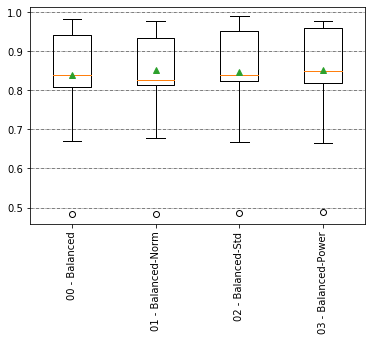

In [39]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color='black' , linestyle='-.' , linewidth = 0.5 )

pyplot.xticks( rotation = 90 )

pyplot.show()